<a href="https://colab.research.google.com/github/DeniseKelley/demo2/blob/master/HW1Question3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Please try using two missing-data imputation methods to impute the ? shown in the Table.**

In [19]:
#Damage- 0/1; Age - (year); Wind Speed - (mph) ; Storm Surge - (feet)
#create data frame
data  <- data.frame(Damage = c(0, 1, 1, 1, 0, 0, 1, 0, 0),
                   Age = c(8, 56, 42, 23, 12, 5, 38, 32, 27),
                   Wind_Speed = c(120, 108, 115, 138, 145, 152, 125, 98, NA),
                   Storm_Surge = c(10, 7, 9, 15, 14, 17, 11, 6, 10))
data2 <- data

In [38]:
#use mean imputation
Wind_mean <-mean(data[["Wind_Speed"]], na.rm = TRUE)
Wind_mean
data[["Wind_Speed"]][is.na(data[["Wind_Speed"]])] <- Wind_mean
data[["Wind_Speed"]]
data

[1] 125.125

[1] 120.000 108.000 115.000 138.000 145.000 152.000 125.000  98.000 125.125

Damage,Age,Wind_Speed,Storm_Surge
<dbl>,<dbl>,<dbl>,<dbl>
0,8,120.000,10
1,56,108.000,7
1,42,115.000,9
1,23,138.000,15
0,12,145.000,14
0,5,152.000,17
1,38,125.000,11
0,32,98.000,6
0,27,125.125,10


In [42]:
# linear interpolation for missing values
data2[["Wind_Speed"]] <- approx(seq_along(data2[["Wind_Speed"]]), data2[["Wind_Speed"]], method = "linear", n= nrow(data2),na.rm = FALSE)$y
data2

Damage,Age,Wind_Speed,Storm_Surge
<dbl>,<dbl>,<dbl>,<dbl>
0,8,120.000,10
1,56,109.500,7
1,42,113.250,9
1,23,129.375,15
0,12,141.500,14
0,5,147.625,17
1,38,145.250,11
0,32,121.625,6
0,27,98.000,10


### **2. Please use VIF to check multicollinearity. If multicollinearity exists, please determine which variable(s) to remove and report the final VIF values for the remaining variable(s). Explain your answer.**

In [48]:
install.packages('car')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’




In [62]:
install.packages("caTools")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [65]:
library(car)
# create model
model <- lm(Damage ~ Age + Wind_Speed + Storm_Surge, data = data)

vif_model<-vif(model)
vif_model

Age  Wind_Speed Storm_Surge 
   1.931422   22.577607   22.859194

VIF for Wind Speed and Storm Surge are high indicating that there could be be a strong correlation between these variable

In [68]:
# correlation between Wind_Speed and Storm_Surge
cor(data$Wind_Speed, data$Storm_Surge)


[1] 0.9774868

The value for cor is close to 1 which shows that there is a strong correlation between wind and storm surge. So we can try and remove wind variable from our data.

In [66]:
# 'Damage' - y
model_without_wind <- lm(Damage ~ Age + Storm_Surge, data = data)
vif_model_without_wind <- car::vif(model_without_wind)
print(vif_model_without_wind)


        Age Storm_Surge 
   1.921539    1.921539 


Final VIF values are improved

### **Please use PCA to extract three principal components and report the results (no need to scale the variables)**

In [69]:
pca_result <- prcomp(data[, c("Age", "Wind_Speed", "Storm_Surge")], center = FALSE, scale. = FALSE)

# Extract the three principal components
principal_components <- pca_result$x[, 1:3]

# Print the results
print(principal_components)

            PC1        PC2        PC3
 [1,] -119.5832 -16.103139  2.1348285
 [2,] -117.2030  33.353026 -0.1937822
 [3,] -121.4113  18.144931 -0.2584339
 [4,] -140.5846  -5.407609 -2.1713327
 [5,] -145.1302 -17.377725  0.4846275
 [6,] -150.8249 -25.855369 -1.1584963
 [7,] -130.5459  12.127011 -0.8447215
 [8,] -102.5598  11.933621  1.7522901
 [9,] -128.3820   1.467836  1.0827958


## **Plot the cumulative proportion of variance v.s. the principal component. If we want to explain 90% of the total variability possibly explained by the model,which principal component(s) should we keep? How about explaining 80% of the total variability? Please explain your answer**

In [109]:
##WITH WIND
# Exclude the "Damage" variable
variables <- data[, names(data) != "Damage"]

# Calculate variances for each variable
variances <- sapply(variables, var)

variances


Age  Wind_Speed Storm_Surge 
   287.2500    305.1094     13.5000

In [110]:
# Calculate the cumulative variance
cumulative_variance <- cumsum(variances) / sum(variances)

# Print the cumulative variance
print(cumulative_variance)


        Age  Wind_Speed Storm_Surge 
  0.4741199   0.9777176   1.0000000 


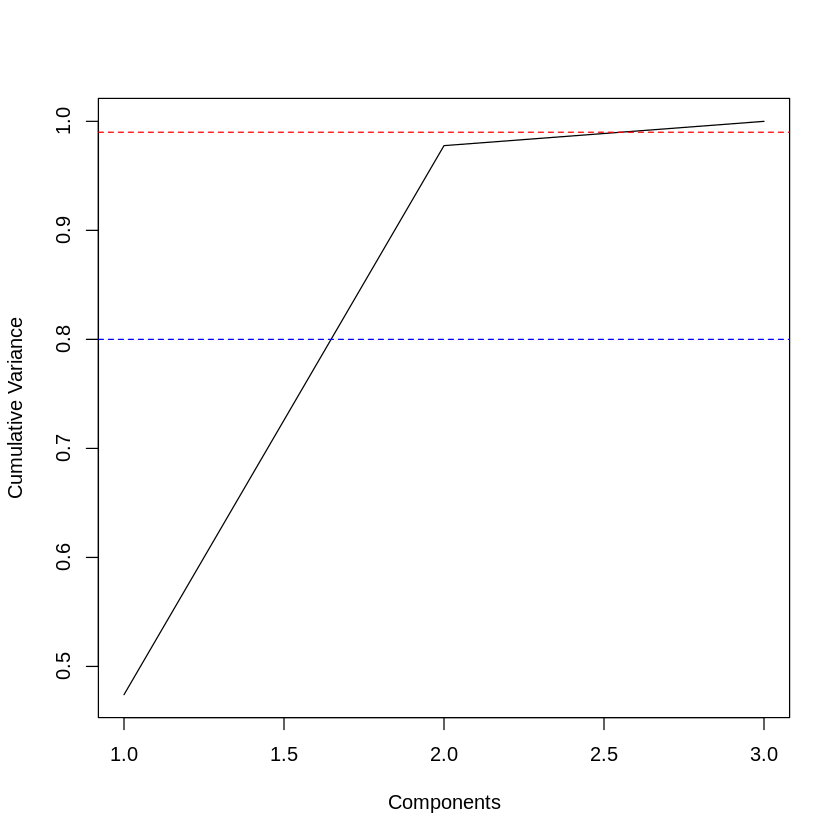

In [115]:
#Plot the cumulative proportion of variance

# Plot cumulative variance as a line plot
plot(cumulative_variance, type = 'l',
     xlab = "Components", ylab = "Cumulative Variance",
     col = "black")

# Add horizontal lines at 0.99 and 0.8
abline(h = 0.99, col = "red", lty = 2)
abline(h = 0.8, col = "blue", lty = 2)


In [116]:
# Find the number of components for 90% and 80% variability
num_components_90 <- which(cumulative_variance >= 0.9)[1]
num_components_80 <- which(cumulative_variance >= 0.8)[1

print(paste("Number of components for 90% variability:", num_components_90))
print(paste("Number of components for 80% variability:", num_components_80))

[1] "Number of components for 90% variability: 2"
[1] "Number of components for 80% variability: 2"
